<a href="https://colab.research.google.com/github/mnitchov/Project-2/blob/main/RandomForestModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [122]:
import os
import asyncio
import numpy as np
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

In [123]:
from google.colab import files
uploaded = files.upload()

Saving TradingSignals_Final.csv to TradingSignals_Final.csv


In [190]:
trading_signals = pd.read_csv('TradingSignals_Final.csv')

In [191]:
trading_signals.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Daily_Return,BollingerMidBand,BollingerSTD,BollingerUpperBand2STD,BollingerLowerBand2STD,Bollinger2STD-BUY,Bollinger2STD-SELL,BollingerUpperBand3STD,BollingerLowerBand3STD,Bollinger3STD-BUY,Bollinger3STD-SELL,MACD,Signal_Line,MACD-Buy,MACD-Sell
0,2017-06-07,38.755001,38.994999,38.619999,38.842499,36.980961,84278400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN
1,2017-06-08,38.812500,38.884998,38.599998,38.747501,36.890507,85003200,-0.002446,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.002029,-0.001127,NaN,36.890507
2,2017-06-09,38.797501,38.797501,36.505001,37.244999,35.460018,259530800,-0.038777,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.046945,-0.019905,NaN,NaN
3,2017-06-12,36.435001,36.522499,35.627499,36.355000,34.612671,289229200,-0.023896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.096816,-0.045959,NaN,NaN
4,2017-06-13,36.790001,36.862499,36.287498,36.647499,34.891159,136661600,0.008046,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.110796,-0.065247,NaN,NaN


In [192]:
# Set index as datetime object and drop extraneous columns
trading_signals.set_index(pd.to_datetime(trading_signals['Date'], infer_datetime_format=True), inplace=True)
trading_signals.drop(trading_signals.columns[[0]], axis=1, inplace=True)
trading_signals.head()

,Open,High,Low,Close,Adj Close,Volume,Daily_Return,BollingerMidBand,BollingerSTD,BollingerUpperBand2STD,BollingerLowerBand2STD,Bollinger2STD-BUY,Bollinger2STD-SELL,BollingerUpperBand3STD,BollingerLowerBand3STD,Bollinger3STD-BUY,Bollinger3STD-SELL,MACD,Signal_Line,MACD-Buy,MACD-Sell
Date,,,,,,,,,,,,,,,,,,,,,
2017-06-07,38.755001,38.994999,38.619999,38.842499,36.980961,84278400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN
2017-06-08,38.812500,38.884998,38.599998,38.747501,36.890507,85003200,-0.002446,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.002029,-0.001127,NaN,36.890507
2017-06-09,38.797501,38.797501,36.505001,37.244999,35.460018,259530800,-0.038777,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.046945,-0.019905,NaN,NaN
2017-06-12,36.435001,36.522499,35.627499,36.355000,34.612671,289229200,-0.023896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.096816,-0.045959,NaN,NaN
2017-06-13,36.790001,36.862499,36.287498,36.647499,34.891159,136661600,0.008046,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.110796,-0.065247,NaN,NaN


In [193]:
# Add Positive Return Column
trading_signals['Positive Return'] = np.where(trading_signals['Daily_Return']>0, 1.0, 0.0)
trading_signals.head()

,Open,High,Low,Close,Adj Close,Volume,Daily_Return,BollingerMidBand,BollingerSTD,BollingerUpperBand2STD,BollingerLowerBand2STD,Bollinger2STD-BUY,Bollinger2STD-SELL,BollingerUpperBand3STD,BollingerLowerBand3STD,Bollinger3STD-BUY,Bollinger3STD-SELL,MACD,Signal_Line,MACD-Buy,MACD-Sell,Positive Return
Date,,,,,,,,,,,,,,,,,,,,,,
2017-06-07,38.755001,38.994999,38.619999,38.842499,36.980961,84278400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,0.0
2017-06-08,38.812500,38.884998,38.599998,38.747501,36.890507,85003200,-0.002446,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.002029,-0.001127,NaN,36.890507,0.0
2017-06-09,38.797501,38.797501,36.505001,37.244999,35.460018,259530800,-0.038777,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.046945,-0.019905,NaN,NaN,0.0
2017-06-12,36.435001,36.522499,35.627499,36.355000,34.612671,289229200,-0.023896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.096816,-0.045959,NaN,NaN,0.0
2017-06-13,36.790001,36.862499,36.287498,36.647499,34.891159,136661600,0.008046,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.110796,-0.065247,NaN,NaN,1.0


In [194]:
trading_signals['Positive Weekly Return'] = trading_signals['Daily_Return'].rolling(5).mean()
trading_signals.head(10)

,Open,High,Low,Close,Adj Close,Volume,Daily_Return,BollingerMidBand,BollingerSTD,BollingerUpperBand2STD,BollingerLowerBand2STD,Bollinger2STD-BUY,Bollinger2STD-SELL,BollingerUpperBand3STD,BollingerLowerBand3STD,Bollinger3STD-BUY,Bollinger3STD-SELL,MACD,Signal_Line,MACD-Buy,MACD-Sell,Positive Return,Positive Weekly Return
Date,,,,,,,,,,,,,,,,,,,,,,,
2017-06-07,38.755001,38.994999,38.619999,38.842499,36.980961,84278400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,0.0,NaN
2017-06-08,38.812500,38.884998,38.599998,38.747501,36.890507,85003200,-0.002446,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.002029,-0.001127,NaN,36.890507,0.0,NaN
2017-06-09,38.797501,38.797501,36.505001,37.244999,35.460018,259530800,-0.038777,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.046945,-0.019905,NaN,NaN,0.0,NaN
2017-06-12,36.435001,36.522499,35.627499,36.355000,34.612671,289229200,-0.023896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.096816,-0.045959,NaN,NaN,0.0,NaN
2017-06-13,36.790001,36.862499,36.287498,36.647499,34.891159,136661600,0.008046,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.110796,-0.065247,NaN,NaN,1.0,NaN
2017-06-14,36.875000,36.875000,35.959999,36.290001,34.550785,126124800,-0.009755,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.131671,-0.083251,NaN,NaN,0.0,-0.013366
2017-06-15,35.830002,36.119999,35.552502,36.072498,34.343712,128661600,-0.005993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.152172,-0.100693,NaN,NaN,0.0,-0.014075
2017-06-16,35.945000,36.125000,35.549999,35.567501,33.862915,201444400,-0.014000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.186338,-0.121275,NaN,NaN,0.0,-0.009120
2017-06-19,35.915001,36.685001,35.915001,36.584999,34.831646,130165600,0.028607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.159100,-0.130013,NaN,NaN,1.0,0.001381


In [195]:
# Clean data

columns_used = ['Positive Weekly Return', 'Positive Return', 'Bollinger2STD-BUY',	'Bollinger2STD-SELL',	'Bollinger3STD-BUY',	'Bollinger3STD-SELL',	'MACD-Buy',	'MACD-Sell']

# Show used columns

trading_signals[columns_used].head()

,Positive Weekly Return,Positive Return,Bollinger2STD-BUY,Bollinger2STD-SELL,Bollinger3STD-BUY,Bollinger3STD-SELL,MACD-Buy,MACD-Sell
Date,,,,,,,,
2017-06-07,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-06-08,NaN,0.0,NaN,NaN,NaN,NaN,NaN,36.890507
2017-06-09,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-06-12,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-06-13,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [196]:
trading_signals[columns_used].replace(np.nan,0)

,Positive Weekly Return,Positive Return,Bollinger2STD-BUY,Bollinger2STD-SELL,Bollinger3STD-BUY,Bollinger3STD-SELL,MACD-Buy,MACD-Sell
Date,,,,,,,,
2017-06-07,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2017-06-08,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,36.890507
2017-06-09,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2017-06-12,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2017-06-13,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...
2021-05-28,-0.001276,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2021-06-01,-0.004468,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2021-06-02,-0.002898,1.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [197]:
new_df = trading_signals[columns_used].replace(np.nan,0)

In [198]:
new_df.head()

,Positive Weekly Return,Positive Return,Bollinger2STD-BUY,Bollinger2STD-SELL,Bollinger3STD-BUY,Bollinger3STD-SELL,MACD-Buy,MACD-Sell
Date,,,,,,,,
2017-06-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2017-06-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36.890507
2017-06-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2017-06-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2017-06-13,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [199]:
new_df['MACD-Sell'].values[new_df['MACD-Sell'].values > 0] = -1
new_df['MACD-Buy'].values[new_df['MACD-Buy'].values > 0] = 1
new_df['Bollinger3STD-SELL'].values[new_df['Bollinger3STD-SELL'].values > 0] = -1
new_df['Bollinger3STD-BUY'].values[new_df['Bollinger3STD-BUY'].values > 0] = 1
new_df['Bollinger2STD-SELL'].values[new_df['Bollinger2STD-SELL'].values > 0] = -1
new_df['Bollinger2STD-BUY'].values[new_df['Bollinger2STD-BUY'].values > 0] = 1
new_df['Positive Weekly Return'].values[new_df['Positive Weekly Return'].values > 0] = 1
new_df['Positive Weekly Return'].values[new_df['Positive Weekly Return'].values < 0] = 0
new_df= new_df.astype(int)
new_df.head(20)

,Positive Weekly Return,Positive Return,Bollinger2STD-BUY,Bollinger2STD-SELL,Bollinger3STD-BUY,Bollinger3STD-SELL,MACD-Buy,MACD-Sell
Date,,,,,,,,
2017-06-07,0,0,0,0,0,0,0,0
2017-06-08,0,0,0,0,0,0,0,-1
2017-06-09,0,0,0,0,0,0,0,0
2017-06-12,0,0,0,0,0,0,0,0
2017-06-13,0,1,0,0,0,0,0,0
2017-06-14,0,0,0,0,0,0,0,0
2017-06-15,0,0,0,0,0,0,0,0
2017-06-16,0,0,0,0,0,0,0,0
2017-06-19,1,1,0,0,0,0,0,0


In [200]:
new_df['MACD Buy/Sell'] = new_df['MACD-Sell'] + new_df['MACD-Buy']
new_df['Bollinger2STD-Buy/Sell'] = new_df['Bollinger2STD-BUY'] + new_df['Bollinger2STD-SELL'] 
new_df['Bollinger3STD-Buy/Sell'] = new_df['Bollinger3STD-BUY'] + new_df['Bollinger3STD-SELL']
new_df.head()

,Positive Weekly Return,Positive Return,Bollinger2STD-BUY,Bollinger2STD-SELL,Bollinger3STD-BUY,Bollinger3STD-SELL,MACD-Buy,MACD-Sell,MACD Buy/Sell,Bollinger2STD-Buy/Sell,Bollinger3STD-Buy/Sell
Date,,,,,,,,,,,
2017-06-07,0,0,0,0,0,0,0,0,0,0,0
2017-06-08,0,0,0,0,0,0,0,-1,-1,0,0
2017-06-09,0,0,0,0,0,0,0,0,0,0,0
2017-06-12,0,0,0,0,0,0,0,0,0,0,0
2017-06-13,0,1,0,0,0,0,0,0,0,0,0


In [201]:
 # Set x variable list of features

x_var_list= ['MACD Buy/Sell',	'Bollinger2STD-Buy/Sell',	'Bollinger3STD-Buy/Sell']

# Filter by x-variable list

new_df[x_var_list].head(50)

,MACD Buy/Sell,Bollinger2STD-Buy/Sell,Bollinger3STD-Buy/Sell
Date,,,
2017-06-07,0,0,0
2017-06-08,-1,0,0
2017-06-09,0,0,0
2017-06-12,0,0,0
2017-06-13,0,0,0
2017-06-14,0,0,0
2017-06-15,0,0,0
2017-06-16,0,0,0
2017-06-19,0,0,0


In [202]:
new_df.index.min(), new_df.index.max()

(Timestamp('2017-06-07 00:00:00'), Timestamp('2021-06-04 00:00:00'))

In [203]:
# Construct training start and end dates
training_start = new_df.index.min().strftime(format= '%Y-%m-%d')
training_end = '2020-12-31'

# Construct testing start and end dates
testing_start =  '2021-01-01'
testing_end = new_df.index.max().strftime(format= '%Y-%m-%d')

# Print training and testing start/end dates
print(f"Training Start: {training_start}")
print(f"Training End: {training_end}")
print(f"Testing Start: {testing_start}")
print(f"Testing End: {testing_end}")

Training Start: 2017-06-07
Training End: 2020-12-31
Testing Start: 2021-01-01
Testing End: 2021-06-04


In [204]:
# Construct the X_train and y_train datasets
X_train = new_df[x_var_list][training_start:training_end]

X_train.tail()

,MACD Buy/Sell,Bollinger2STD-Buy/Sell,Bollinger3STD-Buy/Sell
Date,,,
2020-12-24,0,0,0
2020-12-28,0,-1,0
2020-12-29,0,0,0
2020-12-30,0,0,0
2020-12-31,0,0,0


In [205]:

y_train = new_df['Positive Return'][training_start:training_end]
y_train.head()

Date
2017-06-07    0
2017-06-08    0
2017-06-09    0
2017-06-12    0
2017-06-13    1
Name: Positive Return, dtype: int64

In [206]:
# Construct the X_test and y_test datasets

X_test = new_df[x_var_list][testing_start:testing_end]
X_test.tail()

,MACD Buy/Sell,Bollinger2STD-Buy/Sell,Bollinger3STD-Buy/Sell
Date,,,
2021-05-28,0,0,0
2021-06-01,0,0,0
2021-06-02,0,0,0
2021-06-03,0,0,0
2021-06-04,0,0,0


In [207]:
y_test = new_df['Positive Return'][testing_start:testing_end]

y_test.tail()

Date
2021-05-28    0
2021-06-01    0
2021-06-02    1
2021-06-03    0
2021-06-04    1
Name: Positive Return, dtype: int64

In [208]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [209]:
# Fit a SKLearn linear regression using just the training set (X_train, y_train):
model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=0)

model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [210]:
predictions = model.predict(X_test)
predictions

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [211]:
# Assemble actual y data (y_test) with predicted y data (from just above) into two columns in a dataframe:
Results = y_test.to_frame()
Results['Predicted Value'] =  predictions 
Results.head(30)

,Positive Return,Predicted Value
Date,,
2021-01-04,0,1
2021-01-05,1,0
2021-01-06,0,1
2021-01-07,1,1
2021-01-08,1,1
2021-01-11,0,1
2021-01-12,0,1
2021-01-13,1,1
2021-01-14,0,1


In [212]:
# Replace predicted values 0 to -1 to account for shorting
Results['Predicted Value'].replace(0, -1, inplace=True)
Results.head()

,Positive Return,Predicted Value
Date,,
2021-01-04,0,1
2021-01-05,1,-1
2021-01-06,0,1
2021-01-07,1,1
2021-01-08,1,1


In [213]:
Results['Actual Return'] = trading_signals['Daily_Return']
Results.head(10)

,Positive Return,Predicted Value,Actual Return
Date,,,
2021-01-04,0,1,-0.024719
2021-01-05,1,-1,0.012364
2021-01-06,0,1,-0.033662
2021-01-07,1,1,0.034123
2021-01-08,1,1,0.008631
2021-01-11,0,1,-0.023249
2021-01-12,0,1,-0.001396
2021-01-13,1,1,0.016227
2021-01-14,0,1,-0.015127


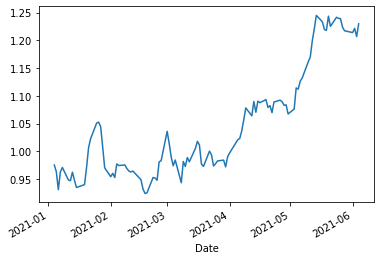

In [214]:
# Calculate cumulative return of model and plot the result
(1 + (Results['Actual Return'] * Results['Predicted Value'])).cumprod().plot()

In [215]:
# Calculating the accuracy score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
acc_score = accuracy_score(y_test, predictions)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))


Accuracy Score : 0.5094339622641509
Classification Report
              precision    recall  f1-score   support

           0       0.70      0.12      0.21        56
           1       0.49      0.94      0.64        50

    accuracy                           0.51       106
   macro avg       0.59      0.53      0.43       106
weighted avg       0.60      0.51      0.42       106



In [216]:
# Get the feature importance array
importances = model.feature_importances_


In [217]:
# List the most important features
importances_sorted = sorted(zip(model.feature_importances_, new_df[x_var_list]), reverse=True)
importances_sorted[:3]

[(0.6531774553058916, 'Bollinger2STD-Buy/Sell'),
 (0.3127333615841278, 'MACD Buy/Sell'),
 (0.03408918310998073, 'Bollinger3STD-Buy/Sell')]